In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

In [2]:
path = os.getcwd() + r'\ex2data1.txt'
path

'D:\\Workspace\\machine-learning-study\\notebooks\\ex2\\ex2data1.txt'

In [3]:
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


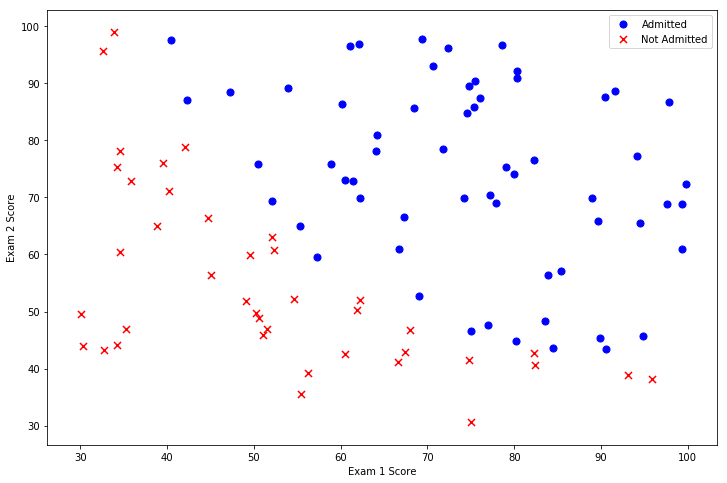

In [4]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

In [5]:
data.insert(0,'Ones',1)

In [6]:
num_cols = data.shape[1]
X = data.iloc[:,0:num_cols-1]
y = data.iloc[:,num_cols-1:num_cols]

In [7]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

In [8]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [9]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

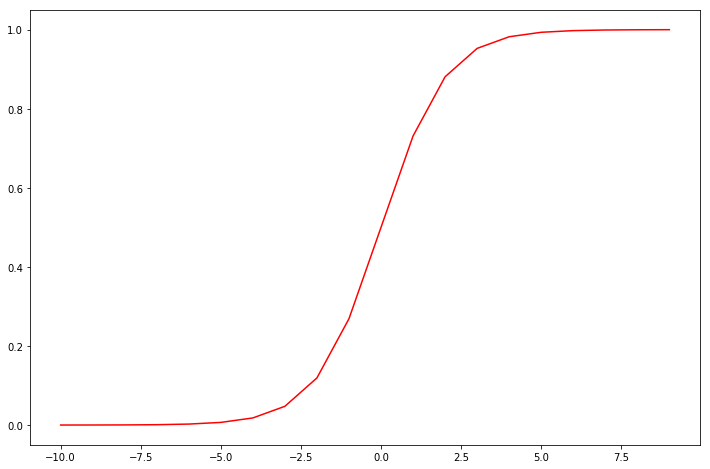

In [10]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), c='r')

In [11]:
def compute_cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second =np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X)

In [12]:
compute_cost(theta, X, y)

0.69314718055994529

In [13]:
def gradient_descent_step(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [14]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient_descent_step, args=(X,y))
compute_cost(result[0], X, y)

0.20349770158947425

In [15]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [21]:
theta_min.x

AttributeError: 'matrix' object has no attribute 'x'

In [17]:
x = np.linspace(data['Exam 1'].min(), data['Exam 1'].max(), 100)
boundary = theta_min[0,0] +((theta_min[0,1] / theta_min[0,2]) * x ) 

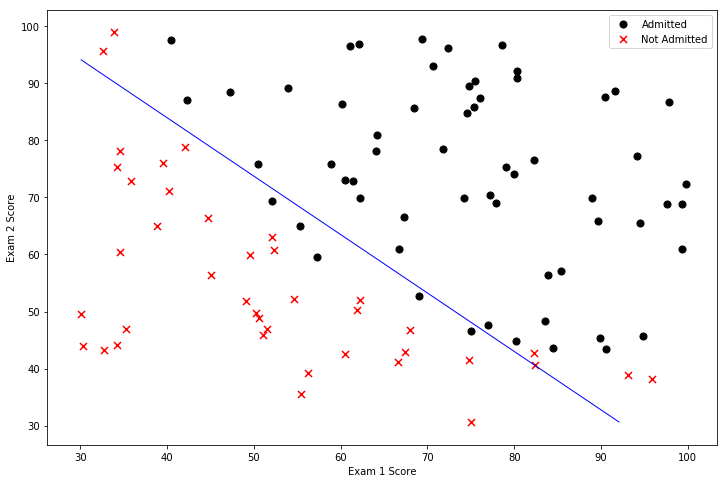

In [26]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='k', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted') 

#look into how this works
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta_min.T))
h = h.reshape(xx1.shape)
ax.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  